In [226]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names= cols)

In [227]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [228]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [229]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continuous_values_cols]

In [230]:
numeric_cars['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
104     6
134     6
128     6
103     5
95      5
94      5
65      5
168     5
85      5
74      5
102     5
93      4
118     4
122     4
106     4
148     4
115     3
83      3
154     3
125     3
137     3
101     3
145     2
129     2
87      2
108     2
188     2
81      2
153     2
119     2
192     2
158     2
89      2
194     2
110     2
197     2
113     2
164     2
107     1
142     1
78      1
98      1
231     1
186     1
77      1
90      1
256     1
121     1
Name: normalized-losses, dtype: int64

## Data Cleaning

In [231]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype('float')

In [232]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [233]:
numeric_cars = numeric_cars.drop(labels='normalized-losses',axis=1)

In [234]:
numeric_cars.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [235]:
numeric_cars = numeric_cars.dropna(subset= ['price'])

In [236]:
numeric_cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-size         0
bore                4
stroke              4
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [237]:
print(numeric_cars[numeric_cars['bore'].isnull()])

    wheel-base  length  width  height  curb-weight  engine-size  bore  stroke  \
55        95.3   169.0   65.7    49.6       2380.0         70.0   NaN     NaN   
56        95.3   169.0   65.7    49.6       2380.0         70.0   NaN     NaN   
57        95.3   169.0   65.7    49.6       2385.0         70.0   NaN     NaN   
58        95.3   169.0   65.7    49.6       2500.0         80.0   NaN     NaN   

    compression-rate  horsepower  peak-rpm  city-mpg  highway-mpg    price  
55               9.4       101.0    6000.0      17.0         23.0  10945.0  
56               9.4       101.0    6000.0      17.0         23.0  11845.0  
57               9.4       101.0    6000.0      17.0         23.0  13645.0  
58               9.4       135.0    6000.0      16.0         23.0  15645.0  


In [238]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())


In [239]:
numeric_cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-size         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [240]:
normalized_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
normalized_cars['price'] = numeric_cars['price']

In [241]:
normalized_cars

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## Univariate Model

In [242]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_columns, target, df):
    np.random.seed(1)
        # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
        #This function should split the data set into a training and test set    
    train_df = rand_df.iloc[0:(int(0.5*(df.shape[0])))]
    test_df = rand_df.iloc[(int(0.5*(df.shape[0]))):]
        #instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_columns]], train_df[target])
    predictions = knn.predict(test_df[[train_columns]])
        #it should calculate the RMSE and return that value.
    mse = mean_squared_error(test_df[target],predictions)
    rmse = (mse)**(1/2)
    
    return rmse

In [243]:
knn_train_test('horsepower', 'price', normalized_cars)

4037.0377131537603

In [244]:
cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
rmse_cols = {}
# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_cols`.

for col in cols:
    
    rmse_cols[col] = knn_train_test(col, 'price', normalized_cars)

rmse_cols


{'bore': 6780.627784685976,
 'city-mpg': 4766.422505090134,
 'compression-rate': 6610.812153159129,
 'curb-weight': 4401.118254793124,
 'engine-size': 3238.4628296477176,
 'height': 8144.441042663747,
 'highway-mpg': 4630.026798588056,
 'horsepower': 4037.0377131537603,
 'length': 5427.2009608367125,
 'peak-rpm': 7697.4596964334805,
 'stroke': 8006.529544647101,
 'wheel-base': 5461.553997873057,
 'width': 4704.482589704386}

In [245]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test_k(train_columns, target, df):
    np.random.seed(1)
        # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
        #This function should split the data set into a training and test set    
    train_df = rand_df.iloc[0:(int(0.5*(df.shape[0])))]
    test_df = rand_df.iloc[(int(0.5*(df.shape[0]))):]
        #instantiate the KNeighborsRegressor class
    k_values = [1,3,5,7,9]
    k_rmse = {}
    for k in k_values:
    
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_columns]], train_df[target])
        predictions = knn.predict(test_df[[train_columns]])
            #it should calculate the RMSE and return that value.
        mse = mean_squared_error(test_df[target],predictions)
        rmse = (mse)**(1/2)
        
        k_rmse[k] = rmse
    
    return k_rmse

In [246]:
cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
k_rmse_results = {}


for col in cols:
    k_rmse_results[col] = knn_train_test_k(col, 'price', normalized_cars)
    
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

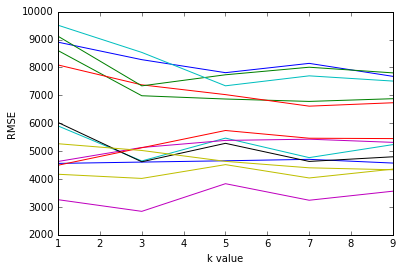

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline


for k,v in k_rmse_results.items():
    x = [1,3,5,7,9]
    y = list(v.values())
    
    plt.plot(x,y, "", markersize=20)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


## Multivariate Model

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

In [248]:
def knn_train_test_columns(train_columns, target, df):
    np.random.seed(1)
        # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
        #This function should split the data set into a training and test set    
    train_df = rand_df.iloc[0:(int(0.5*(df.shape[0])))]
    test_df = rand_df.iloc[(int(0.5*(df.shape[0]))):]
        #instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_columns], train_df[target])
    predictions = knn.predict(test_df[train_columns])
        #it should calculate the RMSE and return that value.
    mse = mean_squared_error(test_df[target],predictions)
    rmse = (mse)**(1/2)
    
    return rmse

to get the best features, calculate the mean with the different Ks

In [249]:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    feature_avg = np.mean(list(v.values()))
    feature_avg_rmse[k] = feature_avg
import operator

feature_avg_rmse = sorted(feature_avg_rmse.items(), key=operator.itemgetter(1))
feature_avg_rmse

[('engine-size', 3346.4845861055824),
 ('horsepower', 4219.377860395267),
 ('width', 4618.910559617357),
 ('curb-weight', 4730.075815236338),
 ('highway-mpg', 5069.469256447656),
 ('length', 5176.394903761173),
 ('city-mpg', 5202.40900297338),
 ('wheel-base', 5252.3924618645415),
 ('compression-rate', 7166.0735987331045),
 ('bore', 7222.472445325499),
 ('stroke', 8000.240466568112),
 ('peak-rpm', 8119.365233100782),
 ('height', 8163.346265875196)]

In [250]:
feature_avg_rmse_top5 = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg' ]

In [251]:
for i in range(2,6):
    train_columns = feature_avg_rmse_top5[0:i]

    result = knn_train_test_columns(train_columns, 'price', normalized_cars)
    
    print('for the {} best features:{}'.format(i, result))

for the 2 best features:2949.8817277180374
for the 3 best features:3580.7376651928435
for the 4 best features:3487.340917327035
for the 5 best features:3410.2170133901805


## Hyperparameter Tuning

In [252]:
def knn_train_test_k_updated(train_columns, target, df):
    np.random.seed(1)
        # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
        #This function should split the data set into a training and test set    
    train_df = rand_df.iloc[0:(int(0.5*(df.shape[0])))]
    test_df = rand_df.iloc[(int(0.5*(df.shape[0]))):]
        #instantiate the KNeighborsRegressor class
    k_values = range(1,25)
    k_rmse = {}
    for k in k_values:
    
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_columns], train_df[target])
        predictions = knn.predict(test_df[train_columns])
            #it should calculate the RMSE and return that value.
        mse = mean_squared_error(test_df[target],predictions)
        rmse = (mse)**(1/2)
        
        k_rmse[k] = rmse
    
    return k_rmse

In [253]:
k_rmse_results = {}

for i in range(2,6):
    train_columns = feature_avg_rmse_top5[0:i]
    
    k_rmse_results['for{} best features'.format(i)] = knn_train_test_k_updated(train_columns, 'price', normalized_cars)

  
  
k_rmse_results

{'for2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 'for3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388

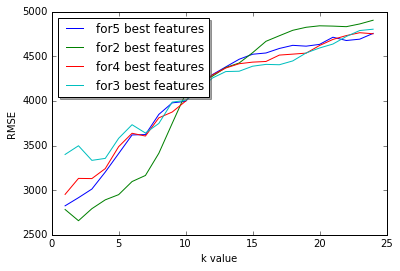

In [260]:
%matplotlib inline


for k,v in k_rmse_results.items():
    x = range(1,25)
    y = list(v.values())
    
    plt.plot(x,y, label="{}".format(k))
    
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(loc='upper left', shadow=True)